In [2]:
import glob
import os
import re
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import lightgbm as lgb

warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'lightgbm'

In [4]:
train = pd.read_csv('../processed_data/train_v6.csv')
test = pd.read_csv('../processed_data/test_v6.csv')

In [6]:
train.head()

,id,y,location,access,layout,age,direction,area,floor,bath_toilet,...,toilet,bath,sm_doku,kanso,onsui,oidaki,b_t_split,23ku,23ku_mean_std,direction_countall
0,1,75000,東京都北区滝野川３丁目,都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...,1K,117,南東,20.01,1,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座,...,2,3,0,1,1,0,1,北区,-0.686553,6150
1,2,76000,東京都中央区月島３丁目,都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...,1R,538,NaN,16.50,5,専用トイレ／\tシャワー／\t温水洗浄便座,...,2,1,0,0,1,0,0,中央区,1.684829,5557
2,3,110000,東京都渋谷区笹塚２丁目,京王線\t笹塚駅\t徒歩6分\t\t京王線\t代田橋駅\t徒歩7分\t\t京王線\t明大前駅...,1K,102,南,22.05,12,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...,...,2,3,1,1,1,0,1,渋谷区,1.421175,17696
3,4,150000,東京都杉並区高円寺南２丁目23-2,総武線・中央線（各停）\t高円寺駅\t徒歩9分\t\t丸ノ内線(池袋－荻窪)\t新高円寺駅\...,2LDK,352,南,60.48,3,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t温水洗浄便座／\t洗面台独立,...,2,3,1,0,1,0,1,杉並区,-0.738958,17696
4,5,74000,東京都葛飾区金町３丁目7-2,京成金町線\t京成金町駅\t徒歩5分\t\t常磐線\t金町(東京都)駅\t徒歩7分\t\t京...,2DK,379,南,39.66,1,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能,...,2,3,0,0,0,1,1,葛飾区,-1.280757,17696


In [8]:
mdl = lgb.Booster(model_file='../mdl/1001_lgbm_log_2.txt')

In [9]:
mdl

In [12]:
use_col = ['age', 'area', 'floor', 'structure', 'max_floor', 'room_num', 'L', 'D',
                'K', 'S', 'north', 'min_time', 'avg_time', 'bicycle_parking','car_parking','bike_parking','23ku_mean_std',
                'direction_countall','toilet','bath','sm_doku','oidaki','onsui','b_t_split','kanso']

In [14]:
feature_importances = pd.DataFrame()
feature_importances['feature'] = use_col
feature_importances['importance'] = mdl.feature_importance()
feature_importances = feature_importances.sort_values(by='importance', ascending=False)
feature_importances

,feature,importance
0,age,14316
1,area,13518
12,avg_time,11506
11,min_time,7469
16,23ku_mean_std,7456
4,max_floor,5174
2,floor,4672
17,direction_countall,4562
3,structure,1748
14,car_parking,916


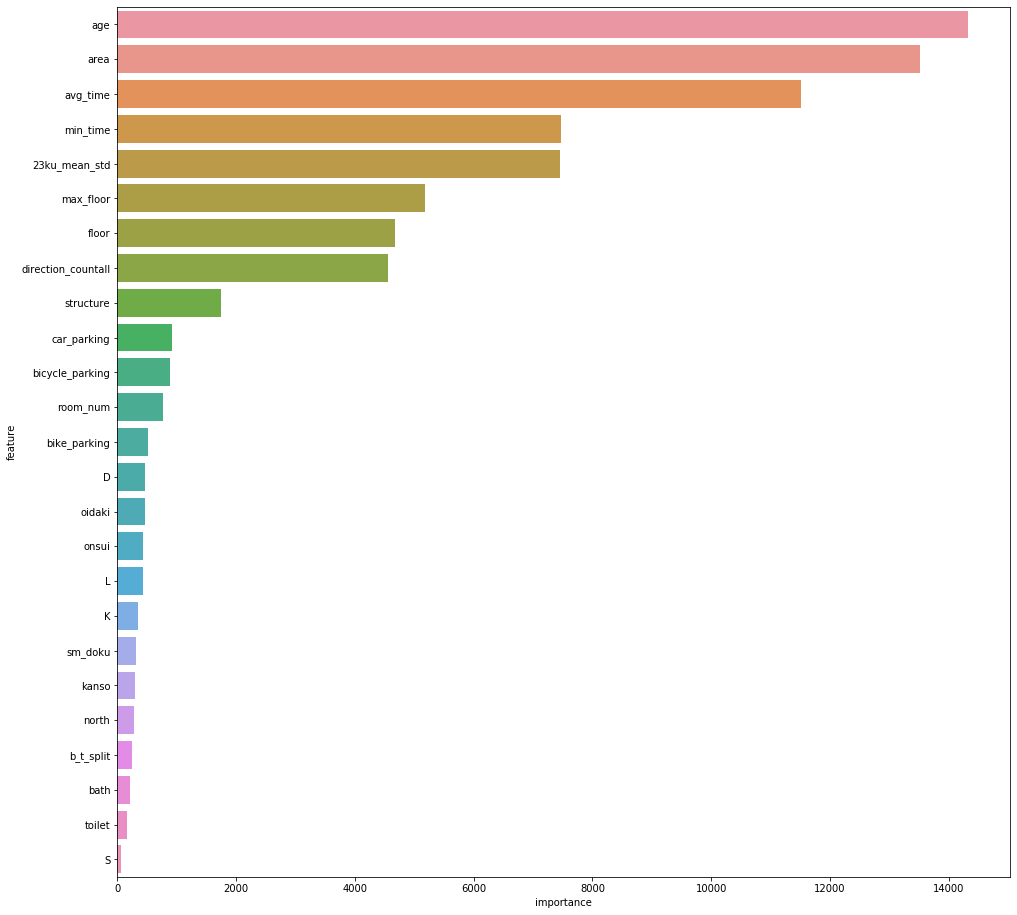

In [15]:
plt.figure(figsize=(16, 16))
sns.barplot(data=feature_importances.head(50), x='importance', y='feature')

NameError: name 'pd' is not defined